<a href="https://colab.research.google.com/github/fboyle2001/dl-rl-coursework-y3/blob/master/rl/RL_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dependencies and setup**

This can take a minute or so...

In [ ]:
%%capture
!pip install 'gym[box2d]'
!apt install xvfb -y
!pip install pyvirtualdisplay

import gym
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import sys
from pyvirtualdisplay import Display
from IPython import display as disp
%matplotlib inline

display = Display(visible=0,size=(600,600))
display.start()
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

plot_interval = 10 # update the plot every N episodes
video_every = 100 # videos can take a very long time to render so only do it every N episodes

**Reinforcement learning agent**

Replace this with your own agent - I recommend starting with TD3 (lecture 8)

In [ ]:
class Agent(nn.Module):
    def __init__(self):
        super(Agent, self).__init__()

    def sample_action(self, s):
        return np.random.uniform(-1.0, 1.0, size=act_dim)

    def train(self):
        return

**Prepare the environment and wrap it to capture videos**

In [ ]:
%%capture
env = gym.make("BipedalWalker-v3")
# env = gym.make("Pendulum-v0") # useful continuous environment for quick experiments
# env = gym.make("BipedalWalkerHardcore-v3") # only attempt this if your agent consistently aces BipedalWalker-v3
env = gym.wrappers.Monitor(env, "./video", video_callable=lambda ep_id: ep_id%video_every == 0, force=True)

obs_dim = env.observation_space.shape[0]
act_dim = env.action_space.shape[0]

In [ ]:
print('The environment has {} observations and the agent can take {} actions'.format(obs_dim, act_dim))
print('The device is: {}'.format(device))

if device.type != 'cpu': print('It\'s recommended to train on the cpu for this')

The environment has 24 observations and the agent can take 4 actions
The device is: cpu


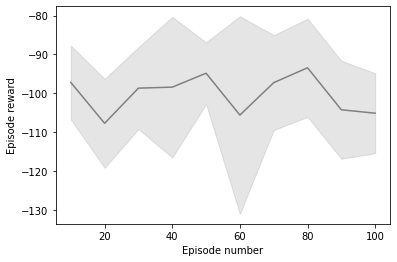

In [ ]:
# in the submission please use seed 42 for verification
seed = 42
torch.manual_seed(seed)
env.seed(seed)
random.seed(seed)
np.random.seed(seed)
env.action_space.seed(seed)

# logging variables
ep_reward = 0
reward_list = []
plot_data = []
log_f = open("agent-log.txt","w+")

# initialise agent
agent = Agent()
max_episodes = 100
max_timesteps = 2000

# training procedure:
for episode in range(1, max_episodes+1):
    state = env.reset()
    for t in range(max_timesteps):

        # select the agent action
        action = agent.sample_action(state)

        # take action in environment and get r and s'
        next_state, reward, done, _ = env.step(action)
        state = next_state
        ep_reward += reward
        
        # stop iterating when the episode finished
        if done or t==(max_timesteps-1):
            break
    
    # append the episode reward to the reward list
    reward_list.append(ep_reward)

    # do NOT change this logging code - it is used for automated marking!
    log_f.write('episode: {}, reward: {}\n'.format(episode, ep_reward))
    log_f.flush()
    ep_reward = 0
    
    # print reward data every so often - add a graph like this in your report
    if episode % plot_interval == 0:
        plot_data.append([episode, np.array(reward_list).mean(), np.array(reward_list).std()])
        reward_list = []
        # plt.rcParams['figure.dpi'] = 100
        plt.plot([x[0] for x in plot_data], [x[1] for x in plot_data], '-', color='tab:grey')
        plt.fill_between([x[0] for x in plot_data], [x[1]-x[2] for x in plot_data], [x[1]+x[2] for x in plot_data], alpha=0.2, color='tab:grey')
        plt.xlabel('Episode number')
        plt.ylabel('Episode reward')
        plt.show()
        disp.clear_output(wait=True)
 
